# KNN

In [136]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [137]:
df=pd.read_csv('C:/Users/USER/Desktop/petrol_consumption.csv')

In [106]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption,target
0,9.0,3571,1976,0.525,541,1
1,9.0,4092,1250,0.572,524,0
2,9.0,3865,1586,0.580,561,1
3,7.5,4870,2351,0.529,414,0
4,8.0,4399,431,0.544,410,1


In [105]:
df.shape

(48, 6)

In [107]:
col_names = ['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)','Petrol_Consumption','target']

df.columns = col_names

df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption', 'target'],
      dtype='object')

In [108]:
for var in df.columns:
    
    print(df[var].value_counts())

7.00     19
8.00     10
9.00      8
7.50      4
8.50      3
10.00     1
6.58      1
5.00      1
6.00      1
Name: Petrol_tax, dtype: int64
5126    2
3571    1
4045    1
3846    1
4188    1
3601    1
3640    1
3333    1
3063    1
3357    1
3528    1
3802    1
3897    1
3721    1
3635    1
4345    1
4449    1
3656    1
4300    1
3745    1
5215    1
4476    1
4296    1
3448    1
4574    1
4092    1
4258    1
3865    1
4870    1
4399    1
5342    1
5319    1
4447    1
4512    1
4391    1
4817    1
4207    1
4332    1
4318    1
4206    1
3718    1
4716    1
4341    1
4593    1
4983    1
4897    1
5002    1
Name: Average_income, dtype: int64
7834     2
1976     1
2619     1
5399     1
9061     1
5975     1
4650     1
6905     1
6594     1
6524     1
4121     1
3495     1
17782    1
6385     1
3274     1
3905     1
4639     1
3985     1
3635     1
2611     1
2302     1
3942     1
4083     1
4746     1
4686     1
1250     1
2449     1
1586     1
2351     1
431      1
1333     1
11868    1
2138

In [109]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
target                          0
dtype: int64

In [110]:
df.isna().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
target                          0
dtype: int64

In [114]:
df['target'].value_counts()

1    28
0    20
Name: target, dtype: int64

In [115]:
df['target'].unique()

array([1, 0], dtype=int64)

In [116]:
df['target'].isna().sum()

0

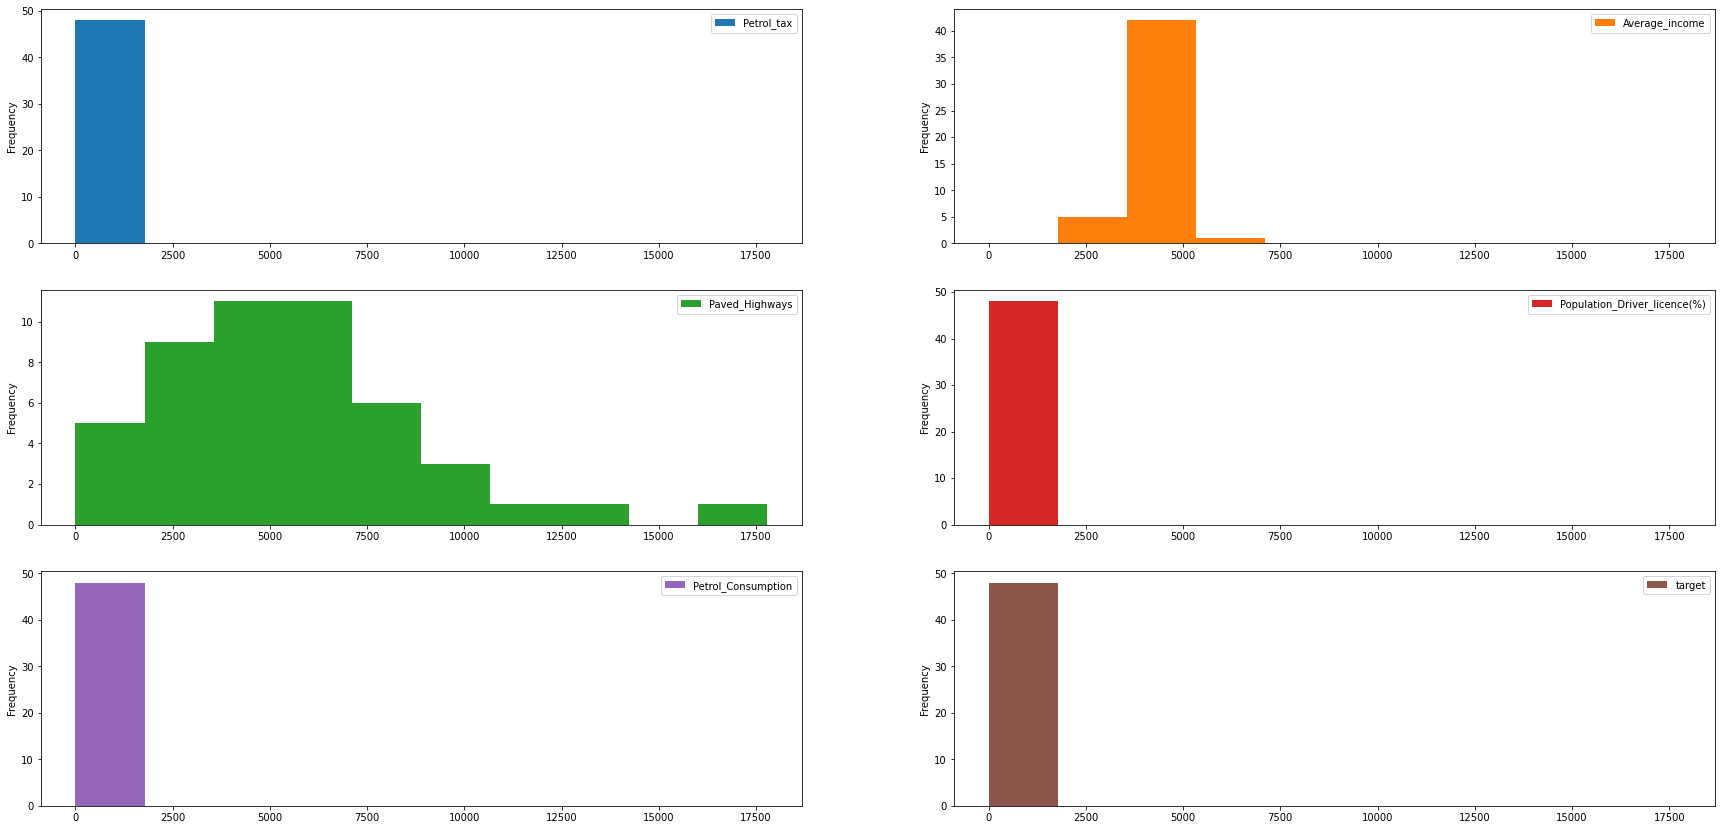

In [117]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

In [118]:
X = df.drop(['target'], axis=1)

y = df['target']

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [120]:
X_train.shape, X_test.shape

((38, 5), (10, 5))

In [121]:
cols = X_train.columns

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [123]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [124]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [125]:
X_train.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,-0.132526,1.505774,2.258546,-0.915791,-0.965469
1,-0.628193,-1.833670,0.212334,-1.128527,-0.256154
2,-0.132526,-1.788970,-0.454195,-0.525775,0.376247
3,-0.132526,-0.878213,0.877245,0.041521,0.401885
4,-0.628193,1.274825,1.074805,0.289713,-0.512533


In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
knn = KNeighborsClassifier(n_neighbors=3)

In [128]:
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(n_neighbors=3)

In [131]:
y_pred = knn.predict(X_test)

y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [132]:
knn.predict_proba(X_test)[:,0]

array([0.33333333, 1.        , 0.66666667, 0.66666667, 0.66666667,
       0.        , 0.33333333, 1.        , 0.66666667, 0.66666667])

In [134]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.40
